In [95]:
#speech signal
# perfomance evaltation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error,auc,roc_curve
import matplotlib.pyplot as plt 
import pandas as pd # manipulation
import numpy as np # calaculation
import seaborn as sns # graph  adavance graph more implamintion
from sklearn.manifold import TSNE # dimension  2d, 3d  remaining all
from sklearn.decomposition import PCA # same above but another method
from sklearn.preprocessing import StandardScaler #preprocessing
from sklearn.cluster import KMeans # ranking clustter futcher ranking
from sklearn.ensemble import IsolationForest # outliners , long distance,cost function
from sklearn.model_selection import train_test_split  # 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import RFE #1.  edhi rANKING KE,   INKOTI ALGORITHM 
from scipy.fft import fft  # advance numpy
import warnings

In [96]:
# Load data
df = pd.read_csv("/Users/kamalraj/Desktop/           /Data science/projects/Parkinson Disease Detection/dataset 1/parkinsons_1.csv")

In [97]:
df.shape

(195, 24)

In [98]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [99]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [100]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [101]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [102]:
# Define target variable and attributes
# feature Selection
target_variable = 'status'
attributes = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP',
              'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
              'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

# Number of attributes
num_attributes = len(attributes)

In [103]:
# Define a function to engineer domain-specific features
def engineer_parkinsons_features(data):
    # Example: Engineering features related to vocal characteristics
    # high, distance
    data['vocal_intensity'] = data['MDVP:Jitter(%)'] * data['MDVP:Shimmer']
    #  high ,- low
    data['vocal_range'] = data['MDVP:Fhi(Hz)'] - data['MDVP:Flo(Hz)']
    
    # Example: Engineering features related to tremors
    # Add chiyale ,ladha multiple chiyale,
    data['tremor_intensity'] = data['MDVP:Shimmer'] + data['MDVP:APQ']
    data['tremor_irregularity'] = data['MDVP:Jitter(%)'] + data['MDVP:RAP']
    
    # Example: Engineering features related to voice breaks
    data['voice_breaks'] = data['MDVP:PPQ'] * data['NHR']
    
    # Additional features based on domain expertise
    
    # 1. Pitch Variability
    # voice base,pitch
    data['pitch_std'] = data['MDVP:Fo(Hz)'].std()
    
    # 2. Tremor Frequency
    # shaking
    data['tremor_frequency'] = data['MDVP:Fo(Hz)'] / data['MDVP:Jitter(Abs)']
    
    # 3. Tremor Dominant Frequency (Example using Fourier Transform)
    spectrum = fft(data['MDVP:APQ'].values)  # Ensure the input data is in the correct format
    dominant_freq_index = np.argmax(np.abs(spectrum))
    dominant_freq = np.fft.fftfreq(len(data['MDVP:APQ']), 1.0 / len(data['MDVP:APQ']))[dominant_freq_index]
    data['tremor_dominant_freq'] = dominant_freq
    
    # 4. Formant Frequency Ratio
    data['formant_ratio'] = data['MDVP:Fo(Hz)'] / data['MDVP:Fhi(Hz)']
    
    # 5. Articulation Rate
    
    data['articulation_rate'] = data['MDVP:PPQ'] / data['MDVP:RAP']
    
    return data

# Create or load your dataset 'df' here
# For demonstration purposes, let's assume 'df' is a DataFrame containing Parkinson's disease data

# Engineer domain-specific features
df = engineer_parkinsons_features(df)

# Check the updated dataset with new features
print(df.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   vocal_intensity  vocal_range  tremor_intensity  tremor_irregularity  \
0         0.

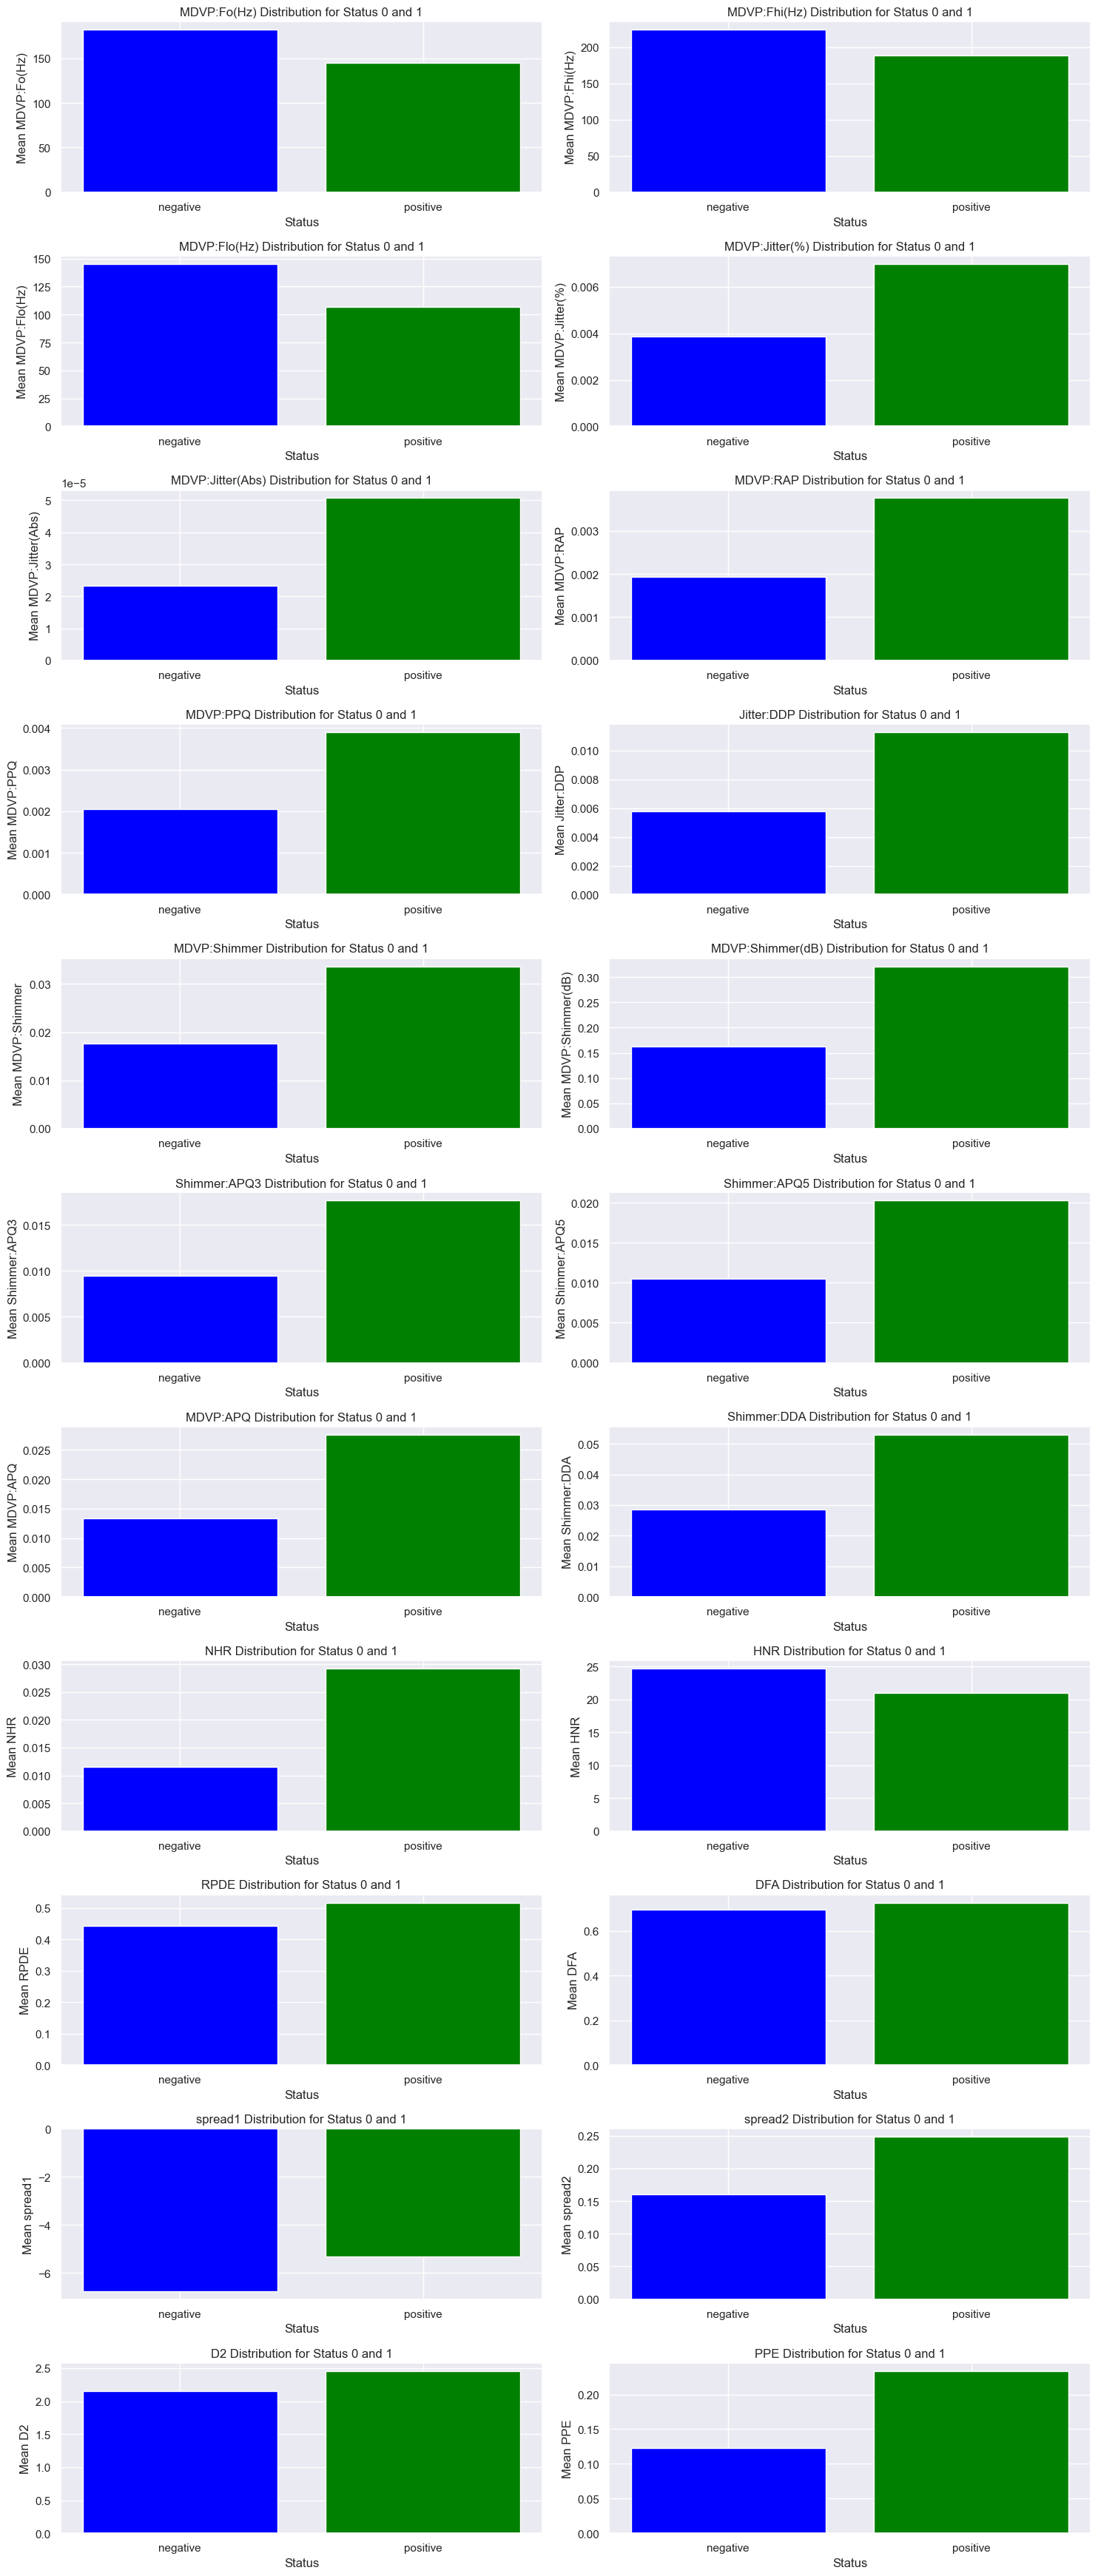

In [104]:
# Exploratory Data Analysis
# Plot mean attribute values for each status
plt.figure(figsize=(15, 5 * (num_attributes // 3)))

for i, attribute in enumerate(attributes):
    plt.subplot(num_attributes // 2, 2, i + 1)

    status_0_data = df[df[target_variable] == 0][attribute]
    status_1_data = df[df[target_variable] == 1][attribute]

    plt.bar(['negative', 'positive'], [status_0_data.mean(), status_1_data.mean()], color=['blue', 'green'])
    plt.title(f'{attribute} Distribution for Status 0 and 1')
    plt.xlabel('Status')
    plt.ylabel(f'Mean {attribute}')

plt.tight_layout()
plt.show()

In [105]:
# Split the dataset based on 'status' column
healthy_df = df[df['status'] == 0]
parkinson_df = df[df['status'] == 1]

# Select numeric columns for each group
healthy_numeric_cols = healthy_df.select_dtypes(include=np.number)
parkinson_numeric_cols = parkinson_df.select_dtypes(include=np.number)

# Skewness analysis for healthy group
healthy_skewness_values = healthy_numeric_cols.skew()

# Skewness analysis for Parkinson group
parkinson_skewness_values = parkinson_numeric_cols.skew()

# Print skewness values for each group
print("Skewness values for healthy individuals:")
print(healthy_skewness_values)

print("\nSkewness values for individuals with Parkinson's disease:")
print(parkinson_skewness_values)


Skewness values for healthy individuals:
MDVP:Fo(Hz)            -0.206080
MDVP:Fhi(Hz)            2.191357
MDVP:Flo(Hz)            0.454401
MDVP:Jitter(%)          2.595196
MDVP:Jitter(Abs)        1.203508
MDVP:RAP                2.227438
MDVP:PPQ                1.898408
Jitter:DDP              2.227230
MDVP:Shimmer            1.632775
MDVP:Shimmer(dB)        1.744643
Shimmer:APQ3            1.495943
Shimmer:APQ5            2.005412
MDVP:APQ                1.043889
Shimmer:DDA             1.495657
NHR                     3.702145
HNR                     0.363758
status                  0.000000
RPDE                    0.311439
DFA                     0.278665
spread1                 0.414532
spread2                -0.253889
D2                      0.007316
PPE                     0.826011
vocal_intensity         2.135752
vocal_range             2.626166
tremor_intensity        1.420602
tremor_irregularity     2.528472
voice_breaks            4.790896
pitch_std               0.000000
tr

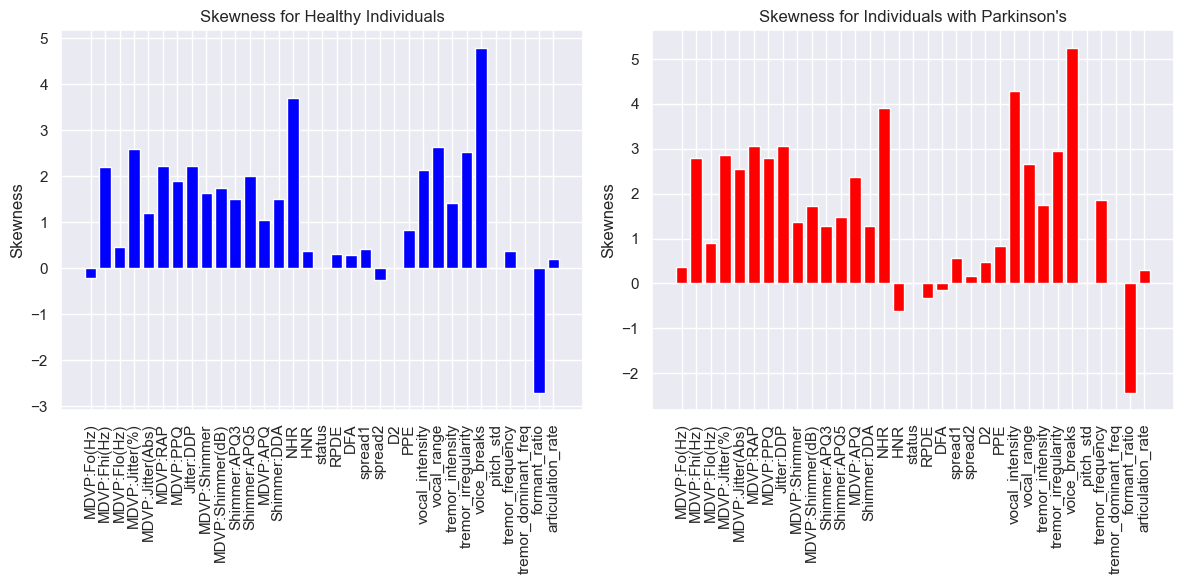

In [106]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot skewness values for healthy individuals
axs[0].bar(healthy_skewness_values.index, healthy_skewness_values.values, color='blue')
axs[0].set_title('Skewness for Healthy Individuals')
axs[0].set_ylabel('Skewness')
axs[0].tick_params(axis='x', rotation=90)

# Plot skewness values for individuals with Parkinson's disease
axs[1].bar(parkinson_skewness_values.index, parkinson_skewness_values.values, color='red')
axs[1].set_title("Skewness for Individuals with Parkinson's")
axs[1].set_ylabel('Skewness')
axs[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [107]:
# Calculate coefficient of variation (CV) for healthy group
healthy_cv_values = (healthy_numeric_cols.std() / healthy_numeric_cols.mean()) * 100

# Calculate coefficient of variation (CV) for Parkinson group
parkinson_cv_values = (parkinson_numeric_cols.std() / parkinson_numeric_cols.mean()) * 100

# Print CV values for each group
print("\nCoefficient of Variation (CV) values for healthy individuals:")
print(healthy_cv_values)

print("\nCoefficient of Variation (CV) values for individuals with Parkinson's disease:")
print(parkinson_cv_values)


Coefficient of Variation (CV) values for healthy individuals:
MDVP:Fo(Hz)             2.898302e+01
MDVP:Fhi(Hz)            4.325187e+01
MDVP:Flo(Hz)            4.046427e+01
MDVP:Jitter(%)          5.314539e+01
MDVP:Jitter(Abs)        6.402608e+01
MDVP:RAP                5.538599e+01
MDVP:PPQ                4.587769e+01
Jitter:DDP              5.539028e+01
MDVP:Shimmer            3.147526e+01
MDVP:Shimmer(dB)        3.548279e+01
Shimmer:APQ3            3.636572e+01
Shimmer:APQ5            3.074724e+01
MDVP:APQ                2.874997e+01
Shimmer:DDA             3.636600e+01
NHR                     1.662361e+02
HNR                     1.391699e+01
status                           NaN
RPDE                    2.083350e+01
DFA                     7.380315e+00
spread1                -9.509641e+00
spread2                 3.929221e+01
D2                      1.440103e+01
PPE                     3.643383e+01
vocal_intensity         7.673524e+01
vocal_range             1.407536e+02
tremor_inten

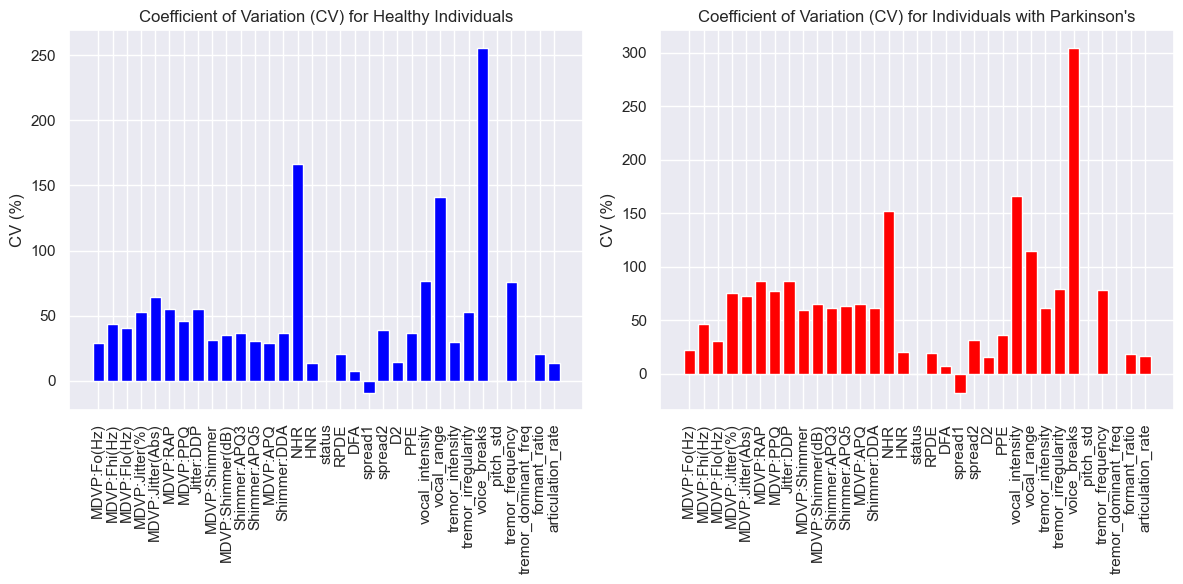

In [108]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot CV values for healthy individuals
axs[0].bar(healthy_cv_values.index, healthy_cv_values.values, color='blue')
axs[0].set_title('Coefficient of Variation (CV) for Healthy Individuals')
axs[0].set_ylabel('CV (%)')
axs[0].tick_params(axis='x', rotation=90)

# Plot CV values for individuals with Parkinson's disease
axs[1].bar(parkinson_cv_values.index, parkinson_cv_values.values, color='red')
axs[1].set_title("Coefficient of Variation (CV) for Individuals with Parkinson's")
axs[1].set_ylabel('CV (%)')
axs[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


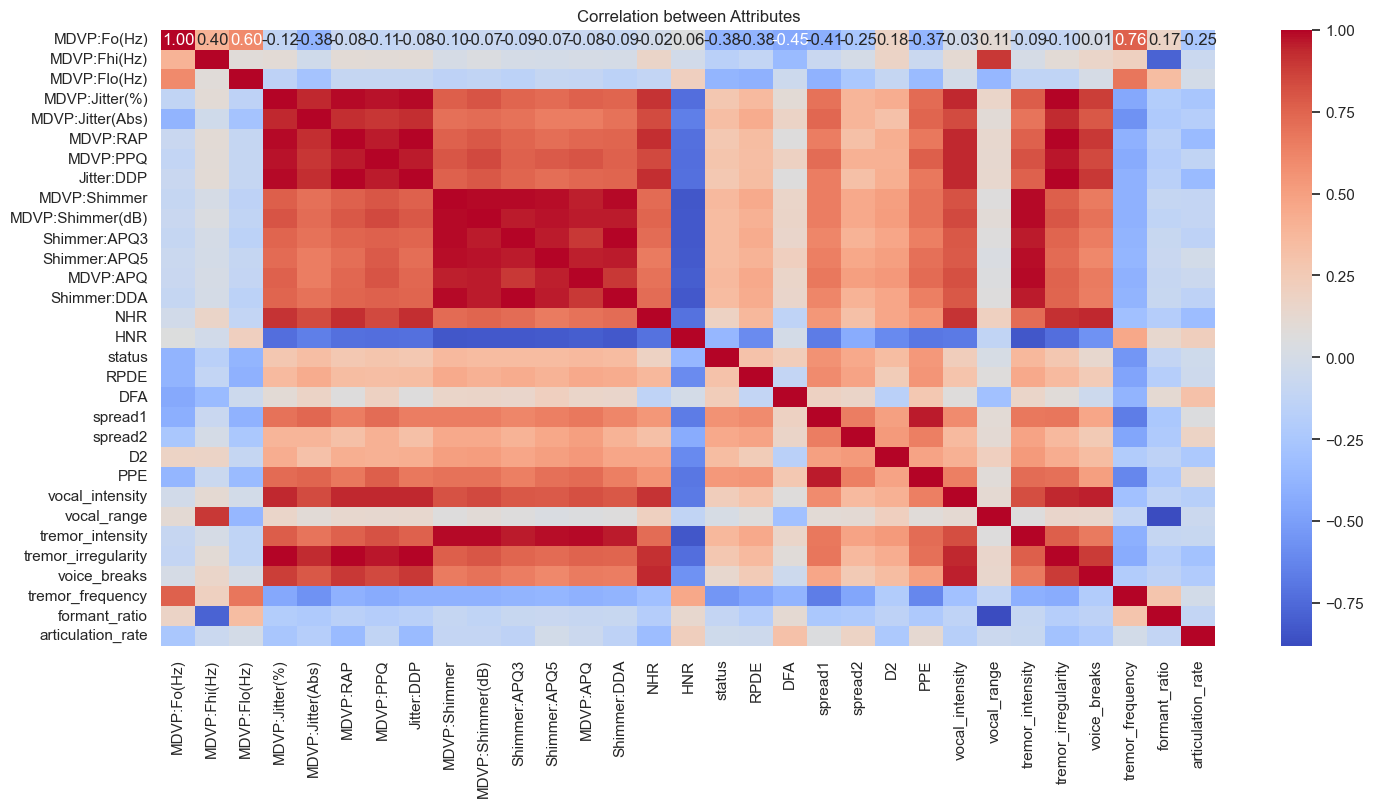

In [109]:
# Define selected columns
selected_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP',
              'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
              'Shimmer:DDA', 'NHR', 'HNR','status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'vocal_intensity',
              'vocal_range','tremor_intensity','tremor_irregularity','voice_breaks','tremor_frequency',
              'formant_ratio','articulation_rate']

# Select the desired columns
correlation_matrix = df[selected_columns].corr()

# Create a heatmap with numerical values
plt.figure(figsize=(17, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation between Attributes")
plt.show()

In [110]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_columns].drop(columns=['status']))

In [111]:
# Dimensionality Reduction: t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

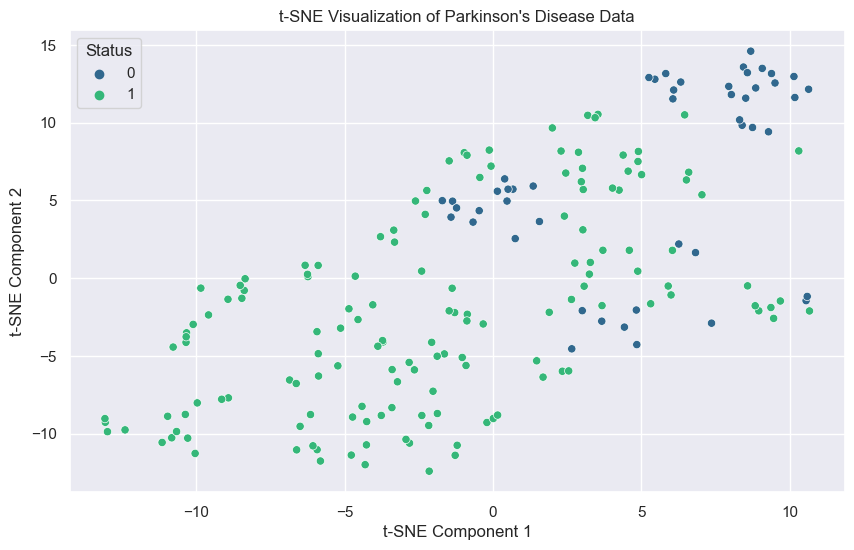

In [112]:
# Create df_selected DataFrame containing only the selected columns
df_selected = df[selected_columns]

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_selected['status'], palette='viridis')
plt.title('t-SNE Visualization of Parkinson\'s Disease Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Status', loc='best')  # Assuming 'PPE' is the column to be used for hue
plt.show()

In [113]:
# Dimensionality Reduction: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

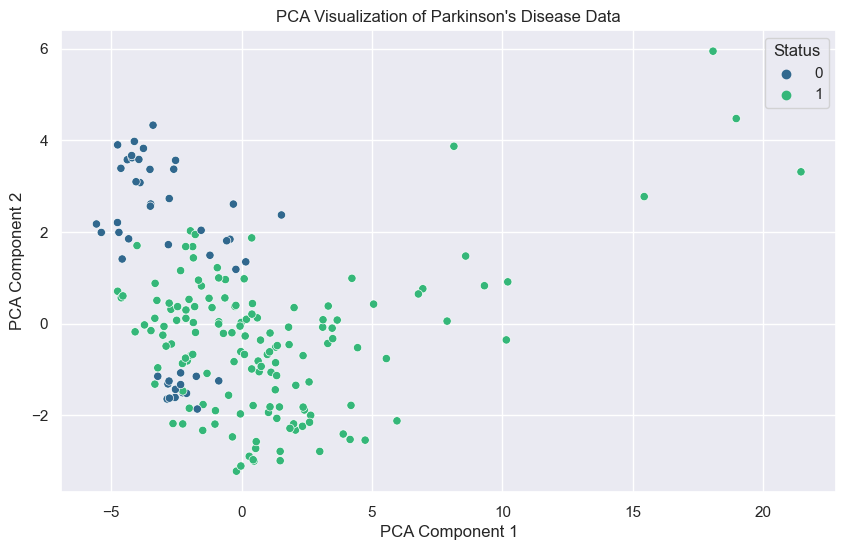

In [114]:
# Plot PCA visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_selected['status'], palette='viridis')
plt.title('PCA Visualization of Parkinson\'s Disease Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Status', loc='best')
plt.show()

In [115]:
# Clustering Analysis: KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
df_selected['cluster'] = kmeans.labels_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2w/gwk84j355pg3_mwj15__p63m0000gn/T/ipykernel_42308/767905336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.labels_


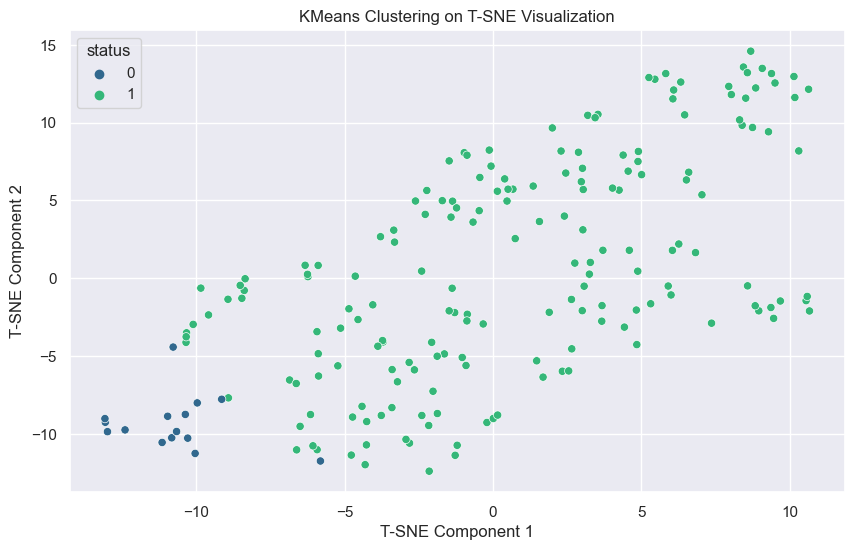

In [119]:
# Plot clusters on t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_selected['cluster'], palette='viridis')
plt.title('KMeans Clustering on T-SNE Visualization')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.legend(title='status', loc='best')
plt.show()

In [23]:
# Outlier Detection: Isolation Forest
isolation_forest = IsolationForest(random_state=42)
outliers = isolation_forest.fit_predict(X_scaled)

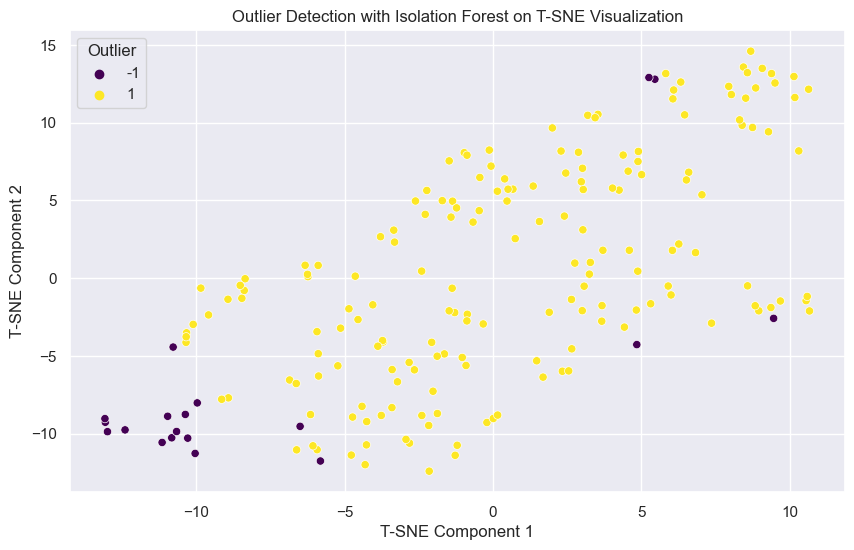

In [120]:
# Plot outliers on t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=outliers, palette='viridis')
plt.title('Outlier Detection with Isolation Forest on T-SNE Visualization')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.legend(title='Outlier', loc='best')
plt.show()

In [52]:
# Feature Importance Ranking
X = df_selected.drop(columns=['status', 'cluster'])
Y = df_selected['status']
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [53]:
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

In [54]:
# Assuming X_train and Y_train are your training features and labels

# Initialize the classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RFE with the classifier
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=5)  # Select top 5 features, adjust as needed

# Fit RFE to the training data
rfe_selector.fit(X_train, Y_train)

# Get the selected features
selected_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Selected': rfe_selector.support_,
    'Rank': rfe_selector.ranking_
})

# Print the selected features
print("Selected Features:")
print(selected_features[selected_features['Selected']])

# Print the ranking of features
print("\nFeature Ranking:")
print(selected_features.sort_values(by='Rank'))


Selected Features:
            Feature  Selected  Rank
0       MDVP:Fo(Hz)      True     1
5           spread1      True     1
6           spread2      True     1
7               PPE      True     1
8  tremor_frequency      True     1

Feature Ranking:
            Feature  Selected  Rank
0       MDVP:Fo(Hz)      True     1
5           spread1      True     1
6           spread2      True     1
7               PPE      True     1
8  tremor_frequency      True     1
1      MDVP:Fhi(Hz)     False     2
2      MDVP:Flo(Hz)     False     3
3        Jitter:DDP     False     4
4               NHR     False     5
9           cluster     False     6


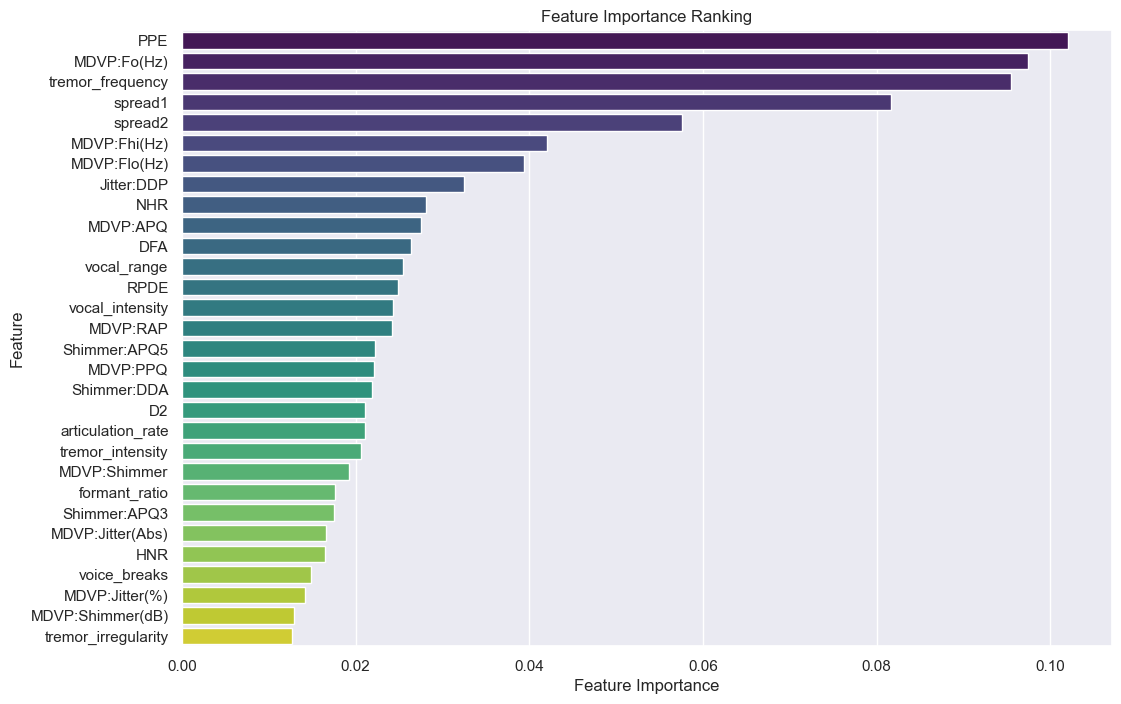

In [55]:
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance Ranking')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [76]:
# Split data into train and test sets
X = df.drop(columns=['name', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP',
              'MDVP:PPQ', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ',
              'Shimmer:DDA', 'HNR','status', 'RPDE', 'DFA','D2', 'vocal_intensity',
              'vocal_range','tremor_intensity','tremor_irregularity','voice_breaks',
              'formant_ratio','articulation_rate'], axis=1)
Y = df["status"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [77]:
# Initialize Logistic Regression model
lr = LogisticRegression(max_iter=1000)  # Increase the number of iterations
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [78]:
# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr)
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)

In [79]:
# Train SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)

In [80]:
# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)

In [81]:
# Convert input data to NumPy arrays
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

# Ensure data is C-contiguous
X_train_array = np.ascontiguousarray(X_train_array)
X_test_array = np.ascontiguousarray(X_test_array)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_array, Y_train)

# Make predictions on the test data
Y_pred_knn = knn.predict(X_test_array)

In [82]:
# Calculate evaluation metrics for KNN
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)

In [83]:
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

In [84]:
# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)

In [85]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42,n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [86]:
# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)

In [87]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

In [88]:
# Calculate evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
f1_xgb = f1_score(Y_test, Y_pred_xgb)
precision_xgb = precision_score(Y_test, Y_pred_xgb)
recall_xgb = recall_score(Y_test, Y_pred_xgb)

In [89]:
# Assuming you have defined Y_test and Y_pred_lr, Y_pred_nb, Y_pred_svm, Y_pred_knn, Y_pred_dt, Y_pred_rf, Y_pred_xgb
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_pred_lr)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_pred_svm)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_pred_knn)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_pred_dt)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_pred_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, Y_pred_xgb)

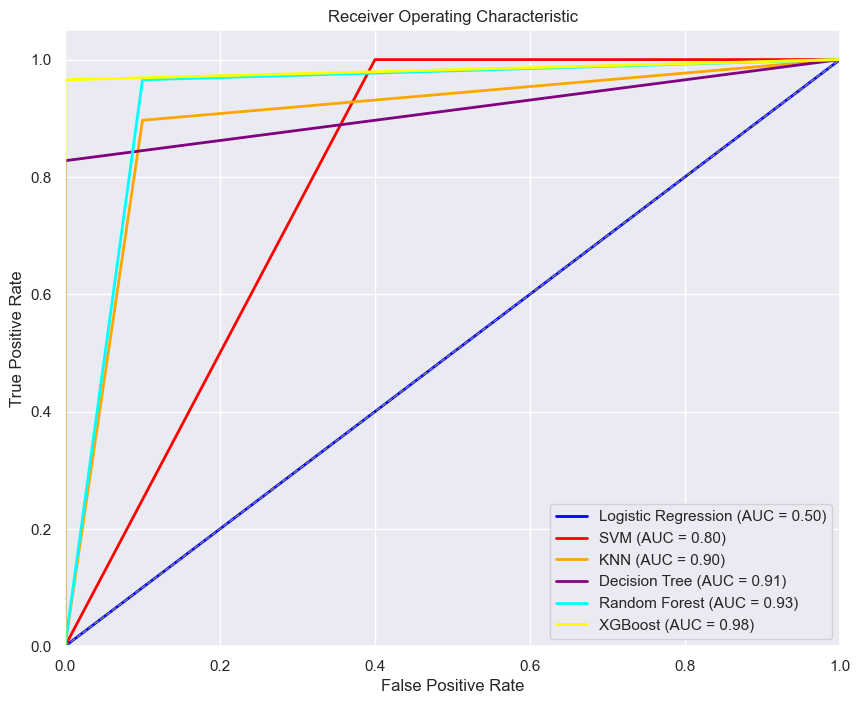

In [90]:
# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc(fpr_lr, tpr_lr):.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'KNN (AUC = {auc(fpr_knn, tpr_knn):.2f})')
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label=f'Decision Tree (AUC = {auc(fpr_dt, tpr_dt):.2f})')
plt.plot(fpr_rf, tpr_rf, color='cyan', lw=2, label=f'Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='yellow', lw=2, label=f'XGBoost (AUC = {auc(fpr_xgb, tpr_xgb):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [91]:
models = [lr, svm, knn, dt, rf, xgb_model]
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network']

for model, model_name in zip(models, model_names):
    # Transform input data if needed
    if isinstance(model, KNeighborsClassifier):
        # Standardize the input data
        scaler = StandardScaler()
        X_test_transformed = scaler.fit_transform(X_test)
    else:
        X_test_transformed = X_test
    
    # Predictions
    Y_pred = model.predict(X_test_transformed)
    
    # Convert predictions for neural network model
    if model_name == 'Neural Network':
        Y_pred = np.round(Y_pred).astype(int)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(Y_test, Y_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(Y_test, Y_pred)
    
    print(f"Metrics for {model_name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("\n")

Metrics for Logistic Regression:
Mean Squared Error (MSE): 0.2564102564102564
Root Mean Squared Error (RMSE): 0.5063696835418333
Mean Absolute Error (MAE): 0.2564102564102564


Metrics for SVM:
Mean Squared Error (MSE): 0.10256410256410256
Root Mean Squared Error (RMSE): 0.32025630761017426
Mean Absolute Error (MAE): 0.10256410256410256


Metrics for KNN:
Mean Squared Error (MSE): 0.2564102564102564
Root Mean Squared Error (RMSE): 0.5063696835418333
Mean Absolute Error (MAE): 0.2564102564102564


Metrics for Decision Tree:
Mean Squared Error (MSE): 0.1282051282051282
Root Mean Squared Error (RMSE): 0.35805743701971643
Mean Absolute Error (MAE): 0.1282051282051282


Metrics for Random Forest:
Mean Squared Error (MSE): 0.05128205128205128
Root Mean Squared Error (RMSE): 0.22645540682891915
Mean Absolute Error (MAE): 0.05128205128205128


Metrics for XGBoost:
Mean Squared Error (MSE): 0.02564102564102564
Root Mean Squared Error (RMSE): 0.16012815380508713
Mean Absolute Error (MAE): 0.0256

In [92]:
# used all
models = [lr, svm, knn, dt, rf, xgb_model]
model_names = ['Logistic Regression','SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']

# Initialize dictionaries to store metrics for each model
metrics_dict = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Precision': [], 'Recall': [], 'MSE': [], 'RMSE': [], 'MAE': []}

for model, model_name in zip(models, model_names):
    # Transform input data if needed
    if isinstance(model, KNeighborsClassifier):
        # Standardize the input data
        X_test_transformed = StandardScaler().fit_transform(X_test)
    else:
        X_test_transformed = X_test
    
    # Predictions
    Y_pred = model.predict(X_test_transformed)
    
    # Convert predictions for neural network model
    if model_name == 'Neural Network':
        Y_pred = np.round(Y_pred)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, Y_pred)
    
    # Update the dictionaries with metrics
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['MSE'].append(mse)
    metrics_dict['RMSE'].append(rmse)
    metrics_dict['MAE'].append(mae)

# Convert the dictionaries to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Rank models based on each metric
metrics_df['Rank_Accuracy'] = metrics_df['Accuracy'].rank(ascending=False)
metrics_df['Rank_F1 Score'] = metrics_df['F1 Score'].rank(ascending=False)
metrics_df['Rank_Precision'] = metrics_df['Precision'].rank(ascending=False)
metrics_df['Rank_Recall'] = metrics_df['Recall'].rank(ascending=False)
metrics_df['Rank_MSE'] = metrics_df['MSE'].rank()
metrics_df['Rank_RMSE'] = metrics_df['RMSE'].rank()
metrics_df['Rank_MAE'] = metrics_df['MAE'].rank()

# Calculate total rank for each model
metrics_df['Total_Rank'] = metrics_df[['Rank_Accuracy', 'Rank_F1 Score', 'Rank_Precision', 'Rank_Recall', 'Rank_MSE', 'Rank_RMSE', 'Rank_MAE']].sum(axis=1)

# Sort models based on total rank
sorted_metrics_df = metrics_df.sort_values(by='Total_Rank')

# Display sorted DataFrame
print(sorted_metrics_df)

                 Model  Accuracy  F1 Score  Precision    Recall       MSE  \
5              XGBoost  0.974359  0.982456   1.000000  0.965517  0.025641   
4        Random Forest  0.948718  0.965517   0.965517  0.965517  0.051282   
1                  SVM  0.897436  0.935484   0.878788  1.000000  0.102564   
3        Decision Tree  0.871795  0.905660   1.000000  0.827586  0.128205   
0  Logistic Regression  0.743590  0.852941   0.743590  1.000000  0.256410   
2                  KNN  0.743590  0.852941   0.743590  1.000000  0.256410   

       RMSE       MAE  Rank_Accuracy  Rank_F1 Score  Rank_Precision  \
5  0.160128  0.025641            1.0            1.0             1.5   
4  0.226455  0.051282            2.0            2.0             3.0   
1  0.320256  0.102564            3.0            3.0             4.0   
3  0.358057  0.128205            4.0            4.0             1.5   
0  0.506370  0.256410            5.5            5.5             5.5   
2  0.506370  0.256410            5

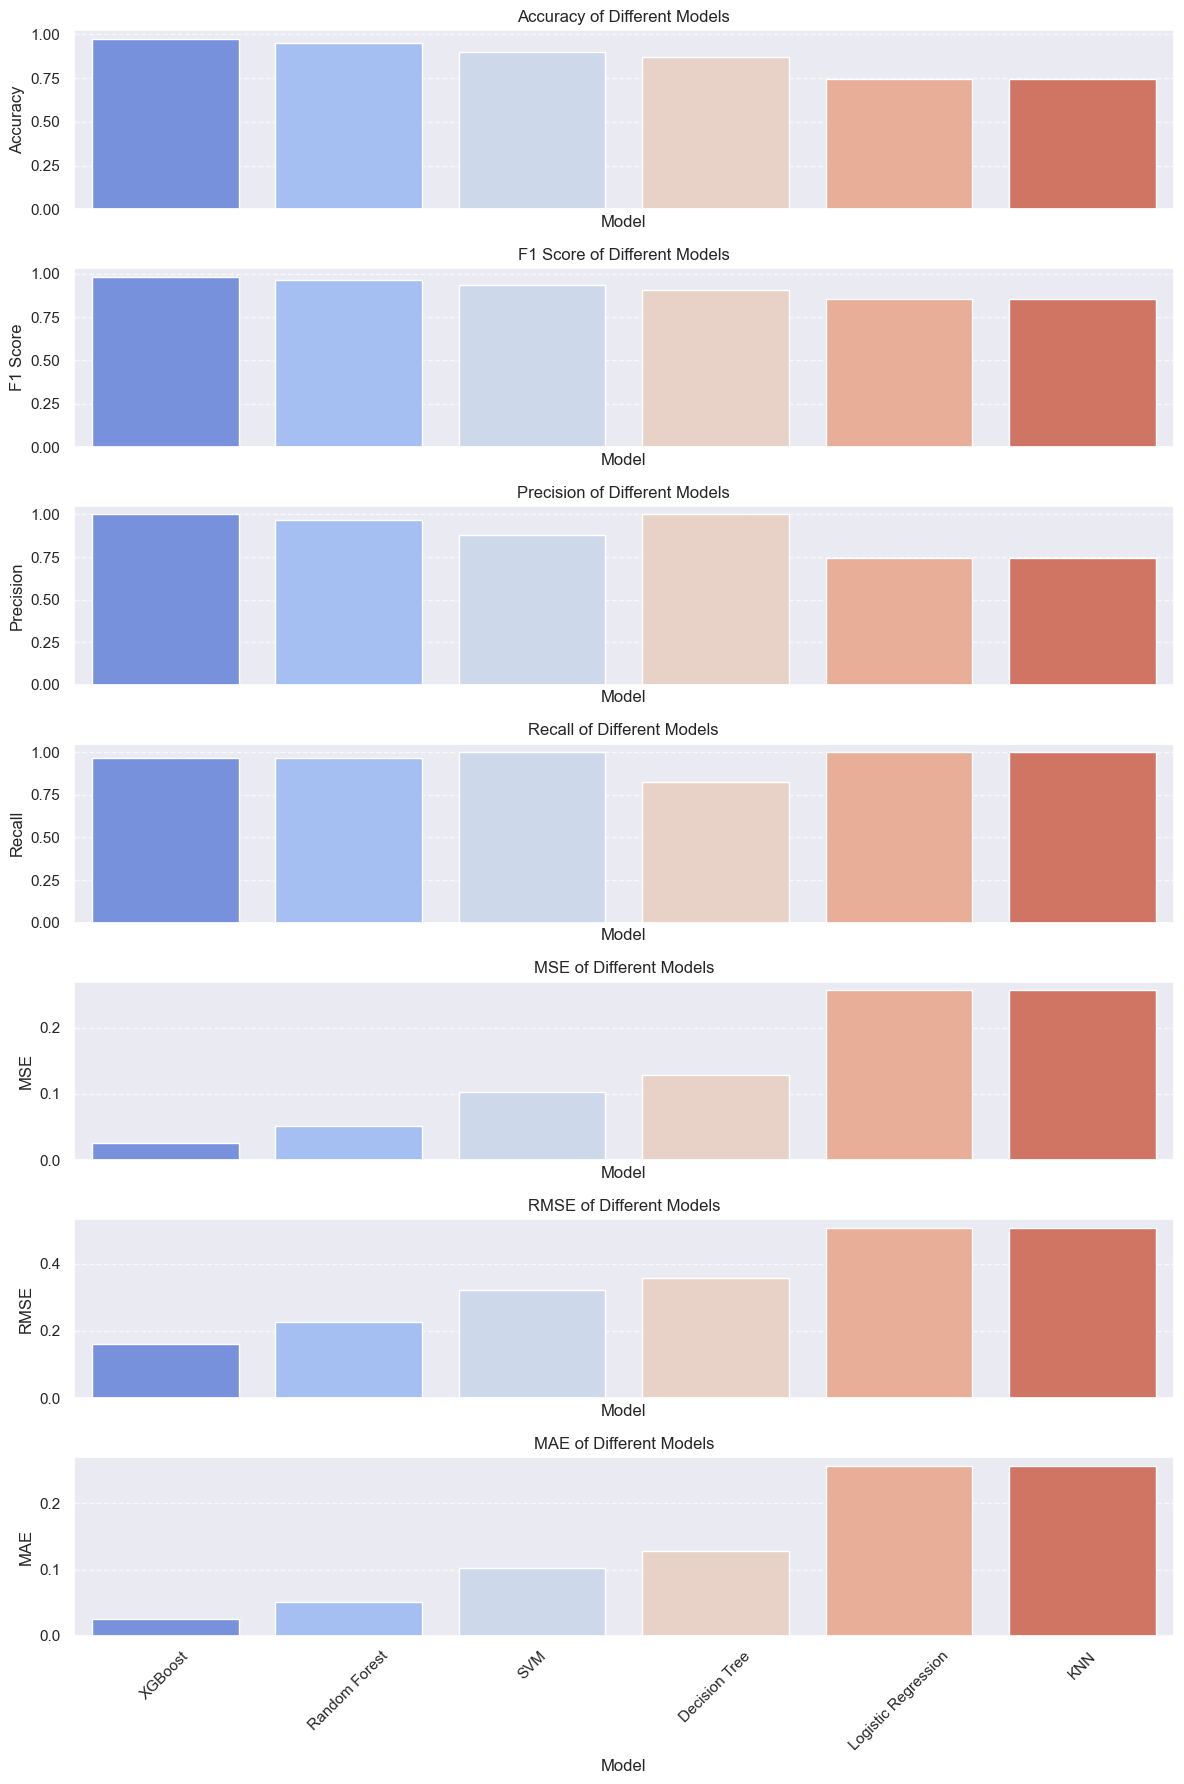

In [93]:
# Set the style of the plots
sns.set(style="darkgrid")

# Define the metrics to plot
metrics_to_plot = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'MSE', 'RMSE', 'MAE']

# Create subplots for each metric
fig, axs = plt.subplots(len(metrics_to_plot), 1, figsize=(12, 18), sharex=True)

# Plot each metric using seaborn barplot
for i, metric in enumerate(metrics_to_plot):
    sns.barplot(x='Model', y=metric, data=sorted_metrics_df, ax=axs[i], palette='coolwarm')
    axs[i].set_ylabel(metric)
    axs[i].set_title(f'{metric} of Different Models')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [94]:
# Define function to evaluate model performance
def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    # Predictions on training set
    Y_train_pred = model.predict(X_train)
    # Predictions on test set
    Y_test_pred = model.predict(X_test)
    
    # Calculate accuracy on training set
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    # Calculate accuracy on test set
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    
    return train_accuracy, test_accuracy

# Evaluate each model
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost']
models = [lr, svm, knn, dt, rf, xgb_model]

for model, model_name in zip(models, model_names):
    # Evaluate model
    train_accuracy, test_accuracy = evaluate_model(model, X_train, Y_train, X_test, Y_test)
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    
    # Check for overfitting or underfitting
    if train_accuracy > test_accuracy:
        print("The model is overfitting.")
    elif train_accuracy < test_accuracy:
        print("The model is underfitting.")
    else:
        print("The model is fitting well.")

        
    print()


Model: Logistic Regression
Training Accuracy: 0.76
Test Accuracy: 0.74
The model is overfitting.

Model: SVM
Training Accuracy: 0.84
Test Accuracy: 0.90
The model is underfitting.

Model: KNN
Training Accuracy: 0.86
Test Accuracy: 0.90
The model is underfitting.

Model: Decision Tree
Training Accuracy: 1.00
Test Accuracy: 0.87
The model is overfitting.

Model: Random Forest
Training Accuracy: 1.00
Test Accuracy: 0.95
The model is overfitting.

Model: XGBoost
Training Accuracy: 1.00
Test Accuracy: 0.97
The model is overfitting.



/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
